# Scenario C - Peak Number Variation (results evaluation)

This file is used to evaluate the inference (numerical) results.

The model used in the inference of the parameters is formulated as follows: 

\begin{equation}
\large y = f(x) = \sum\limits_{m=1}^M \big[A_m \cdot e^{-\frac{(x-\mu_m)^2}{2\cdot\sigma_m^2}}\big] + \epsilon
\end{equation}

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymc3 as pm
import arviz as az
import seaborn as sns

#az.style.use('arviz-darkgrid')

print('Running on PyMC3 v{}'.format(pm.__version__))

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Running on PyMC3 v3.8


## Load results summary

In [2]:
# load results from disk
df = pd.read_csv('./output_adapt_diag/scenario_peaks.csv')
df.index += 1
#df.sort_values(by=['waic'], ascending=False)
df

,r_hat,mcse,ess,bfmi,r2,waic,epsilon,epsilon_real,model,peaks
1,1.000000,0.000000,5072.142857,1.152188,0.998210,-2201.212157,0.115364,0.05,2,2
2,1.000000,0.000000,5197.714286,1.120773,0.999820,-4655.315190,0.051178,0.05,2,2
3,1.000000,0.000000,4738.142857,1.058303,0.999735,-3927.437595,0.065093,0.05,2,2
4,1.000000,0.000000,5013.000000,1.047573,0.999783,-4683.069263,0.050703,0.05,2,2
5,1.000000,0.003000,3627.714286,1.102391,0.745830,6637.348223,2.204154,0.05,2,3
6,1.000000,0.000143,4612.285714,1.024178,0.997466,368.284011,0.270196,0.05,2,3
7,1.000000,0.001857,4373.857143,1.059443,0.871816,5312.772630,1.417654,0.05,2,3
8,1.000000,0.002000,3210.571429,1.035757,0.886003,5368.257205,1.443164,0.05,2,3
9,1.000000,0.004000,3155.285714,1.093701,0.721936,7593.157916,3.033243,0.05,2,4
10,1.000000,0.001857,4860.857143,1.050099,0.843484,4981.971780,1.265745,0.05,2,4


In [9]:
peak_numbers = [2, 3, 4]
waic_mat = np.full((3,3),0.0)
rhat_mat = np.full((3,3),0.0)
r2_mat = np.full((3,3),0.0)
bfmi_mat = np.full((3,3),0.0)

for i, val in enumerate(peak_numbers):
    ret1 = df.loc[(df['model'] == val)]
    for j, val in enumerate(peak_numbers):
        ret2 = ret1.loc[(ret1['peaks'] == val)]
        waic_mat[i][j] = ret2['waic'].mean()
        rhat_mat[i][j] = ret2['r_hat'].mean()
        r2_mat[i][j] = ret2['r2'].mean()
        bfmi_mat[i][j] = ret2['bfmi'].mean()
        #print(i, j, waic_mat[i][j], rhat_mat[i][j])

In [4]:
def heatmap(data, title, color, fsize):
    
    sns.set(font_scale=1.3)

    yticks = ["2-peak model", "3-peak model", "4-peak-model"]
    xticks = ["2-peak data", "3-peak data", "4-peak data"]

    plt.figure(figsize=figs)
    plt.title(title)

    sns.heatmap(data, annot=True, fmt=".2f", linewidths=1, square=True,
                    cmap=color, cbar=False, xticklabels=xticks, yticklabels=yticks);

    plt.yticks(rotation=0)
    plt.xticks(rotation=0)
    plt.show()

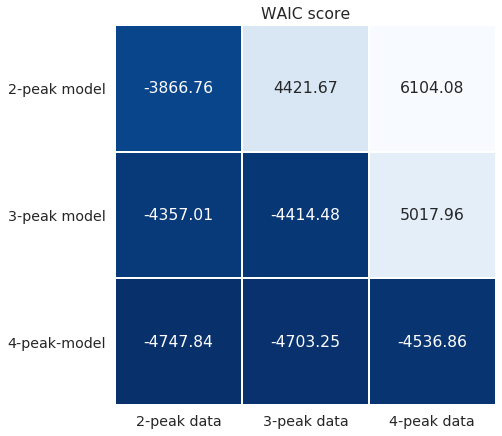

In [11]:
figs=(7,7)
col = "Blues_r" 

heatmap(waic_mat, "WAIC score", col, figs)

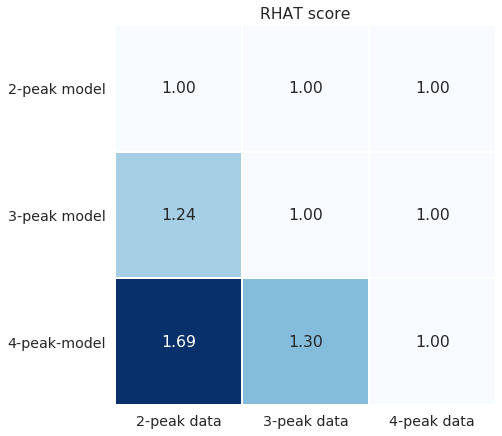

In [12]:
heatmap(rhat_mat, "RHAT score", "Blues", figs)

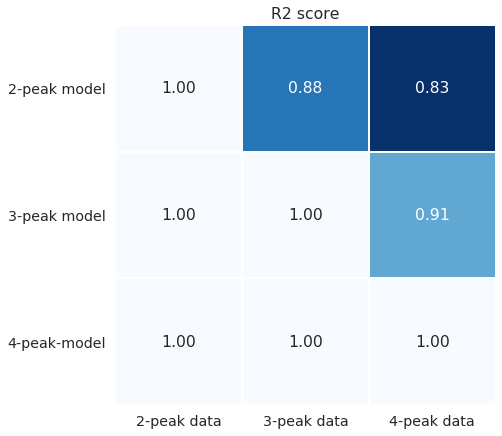

In [13]:
heatmap(r2_mat, "R2 score", col, figs)

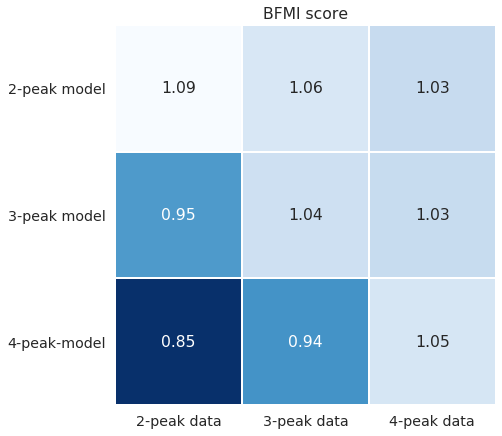

In [14]:
heatmap(bfmi_mat, "BFMI score", col, figs)

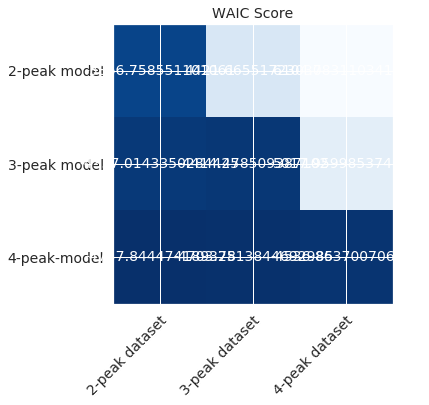

In [15]:
models = ["2-peak model", "3-peak model", "4-peak-model"]
data = ["2-peak dataset", "3-peak dataset", "4-peak dataset"]

fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(waic_mat, cmap="Blues_r")

fs=14

# We want to show all ticks...
ax.set_xticks(np.arange(len(data)))
ax.set_yticks(np.arange(len(models)))

# ... and label them with the respective list entries
ax.set_xticklabels(data, size=fs)
ax.set_yticklabels(models, size=fs)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(models)):
    for j in range(len(data)):
        text = ax.text(j, i, waic_mat[i, j], ha="center", va="center", color="w", size=fs)

ax.set_title("WAIC Score", size=fs)
fig.tight_layout()